In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold=pd.read_csv("D:/datasets/gld_price_data.csv")

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
correlation=gold.corr()

<AxesSubplot:>

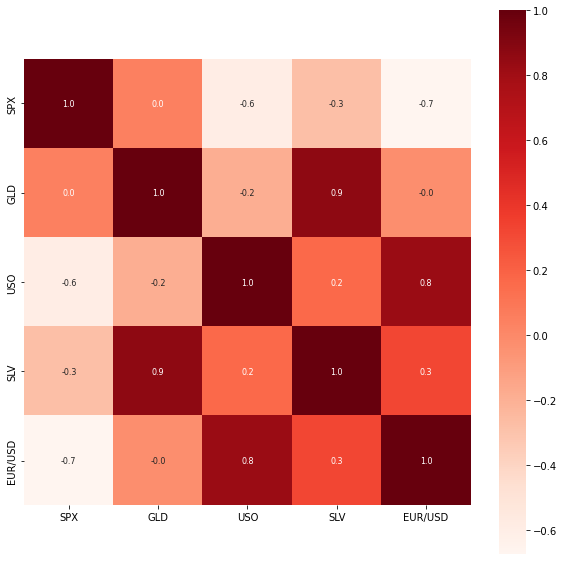

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


(array([ 55., 232., 155., 383., 738., 257.,  73., 209., 161.,  27.]),
 array([ 70.       ,  81.4589996,  92.9179992, 104.3769988, 115.8359984,
        127.294998 , 138.7539976, 150.2129972, 161.6719968, 173.1309964,
        184.589996 ]),
 <BarContainer object of 10 artists>)

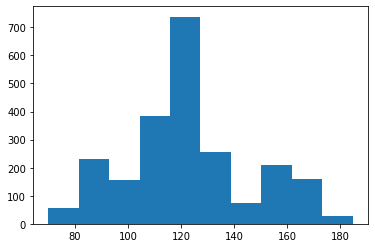

In [20]:
plt.hist(gold['GLD'])

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

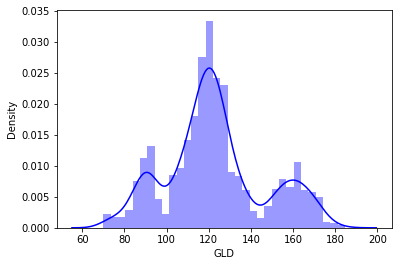

In [15]:
sns.distplot(gold['GLD'],color='blue')

In [16]:
X=gold.drop(['Date','GLD'],axis=1)
Y=gold['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
X_train.shape

(1832, 4)

In [23]:
X_test.shape

(458, 4)

In [24]:
reg=RandomForestRegressor(n_estimators=100)

In [25]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
test_prediction=(reg.predict(X_test))

In [28]:
print(test_prediction)

[168.66369907  82.15789987 115.81290028 127.53400067 120.75710127
 154.83309785 150.32029825 126.01360035 117.39069873 126.06830033
 116.77100092 172.21690059 141.48939837 167.86969846 115.19940027
 117.83500049 139.48000314 170.07260078 159.72990347 156.37639925
 155.05239998 125.03680004 176.13679985 157.15540407 125.11440075
  93.96500008  77.19740034 120.76519981 119.04819935 167.45989986
  88.15080077 125.05439975  90.95190047 117.8527     121.09199928
 137.10490054 115.48500115 115.11770097 147.53019962 107.22500066
 104.5192022   87.29139793 126.44200072 117.82210003 152.95859912
 119.72349973 108.45969993 108.09219834  93.21780054 127.1947974
  74.6492006  113.7008992  121.43690036 111.13179926 119.00249907
 120.48619944 159.43149881 168.03070129 146.80799681  85.84559862
  94.37220051  86.9162992   90.40150048 118.99830053 126.45340067
 127.41630006 168.60810052 122.33579933 117.44339913  98.61150035
 168.49660144 143.04999839 132.30340225 121.21320225 120.68479919
 119.657500

In [29]:
error=metrics.r2_score(Y_test,test_prediction)

In [30]:
print(error)

0.9891217455450636


In [31]:
Y_test=list(Y_test)

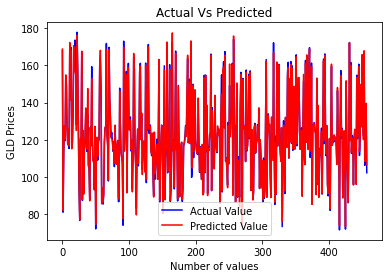

In [36]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_prediction,color='red',label='Predicted Value')
plt.title('Actual Vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Prices')
plt.legend()
plt.show()